In [ ]:
! pip install mediapipe

In [49]:
# based mostly on https://github.com/google-ai-edge/mediapipe-samples/blob/main/examples/pose_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Pose_Landmarker.ipynb
# and https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker/python

In [41]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
      
  return annotated_image

In [7]:
model_path = '.\\mediapipe_models\\pose_landmarker_heavy.task'

In [27]:
import cv2

def extract_frame(video_path, frame_number):
    video_capture = cv2.VideoCapture(video_path)
    if not video_capture.isOpened():
        print("Error: Could not open video.")
        return None

    # Printing some video stats
    total_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames: {total_frames}") 
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    print(f"Frames Per Second (FPS): {fps}")
    frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"Frame Height: {frame_height}, frame Width: {frame_width}")
    
    video_capture.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    success, frame = video_capture.read()

    if not success:
        print(f"Error: Could not read frame {frame_number}.")
        return None

    video_capture.release()

    return frame

In [32]:
key_name = 'p7s1'
file_name = 'c1_0090'
sample_avi_path = f'.\\gait3d\\Sequences\\{key_name}\\Images\\{file_name}.avi'
frame_number = 90
print(sample_avi_path)

dest_filename = f'.\\sample_imgs\\{file_name}_{frame_number}.jpg'
frame = extract_frame(sample_avi_path, frame_number)

if frame is not None:
    cv2.imwrite(dest_filename, frame)

.\gait3d\Sequences\p7s1\Images\c1_0090.avi
Total number of frames: 120
Frames Per Second (FPS): 25.0
Frame Height: 540, frame Width: 960


In [29]:
from scripts.parsers import parse_sequences

file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequences(file_path)
print(sequences[key_name])

{'start_frame': 90, 'number_of_frames': 120, 'frame_offset': 0, 'MoCap_data': True}


In [30]:
from scripts.parsers import parse_sequences
key_name = 'p4s1'

file_path = 'gait3d\\ListOfSequences.txt'
sequences = parse_sequences(file_path)
print(sequences[key_name])

{'start_frame': 130, 'number_of_frames': 120, 'frame_offset': 0, 'MoCap_data': True}


In [34]:
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)

mp_image = mp.Image.create_from_file(dest_filename)

with PoseLandmarker.create_from_options(options) as landmarker:
    pose_landmarker_result = landmarker.detect(mp_image)
    

C:\Users\Miko7\Studia\magisterka\gait-features-identification\venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [37]:
print(pose_landmarker_result)

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.21291522681713104, y=0.2348673939704895, z=-0.11386317759752274, visibility=0.9999790191650391, presence=0.9999973773956299), NormalizedLandmark(x=0.21528607606887817, y=0.2224123626947403, z=-0.13386492431163788, visibility=0.9999878406524658, presence=0.9999973773956299), NormalizedLandmark(x=0.21607251465320587, y=0.22186513245105743, z=-0.13401004672050476, visibility=0.9999866485595703, presence=0.9999978542327881), NormalizedLandmark(x=0.21662892401218414, y=0.22145412862300873, z=-0.1339724063873291, visibility=0.9999910593032837, presence=0.9999974966049194), NormalizedLandmark(x=0.21619382500648499, y=0.22158488631248474, z=-0.10953709483146667, visibility=0.9999874830245972, presence=0.9999957084655762), NormalizedLandmark(x=0.21759173274040222, y=0.22052869200706482, z=-0.1096516028046608, visibility=0.9999854564666748, presence=0.9999958276748657), NormalizedLandmark(x=0.21908000111579895, y=0.21937993168830872, z

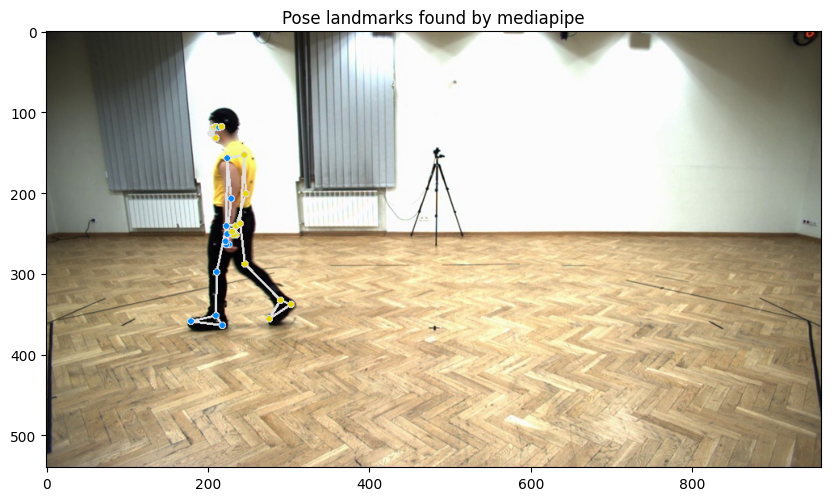

In [54]:
import matplotlib.pyplot as plt

annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), pose_landmarker_result)

plt.figure(figsize=(10, 8))
plt.imshow(annotated_image)
# plt.axis('off')
plt.title('Pose landmarks found by mediapipe')
plt.show()

In [58]:
key_name = 'p7s1'
file_name = 'c2_0090'
sample_avi_path = f'.\\gait3d\\Sequences\\{key_name}\\Images\\{file_name}.avi'
frame_number = 60
print(sample_avi_path)

dest_filename = f'.\\sample_imgs\\{file_name}_{frame_number}.jpg'
frame = extract_frame(sample_avi_path, frame_number)

if frame is not None:
    cv2.imwrite(dest_filename, frame)

.\gait3d\Sequences\p7s1\Images\c2_0090.avi
Total number of frames: 120
Frames Per Second (FPS): 25.0
Frame Height: 540, frame Width: 960


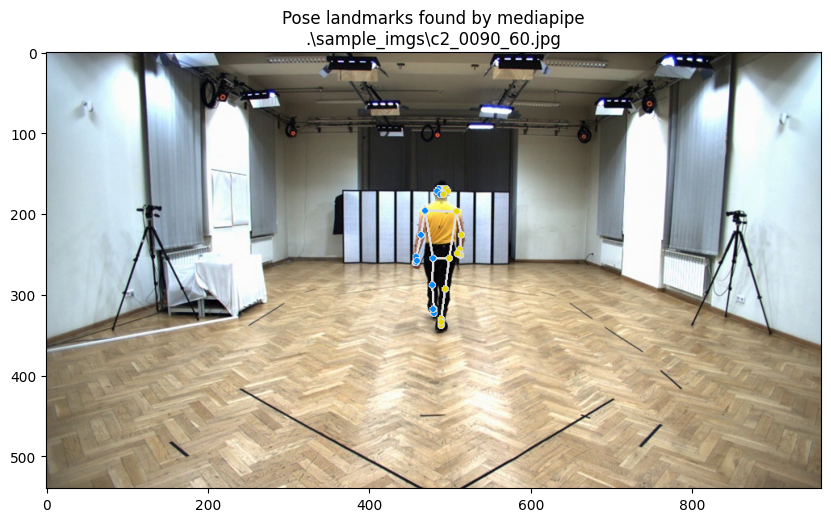

In [59]:
mp_image = mp.Image.create_from_file(dest_filename)

with PoseLandmarker.create_from_options(options) as landmarker:
    pose_landmarker_result = landmarker.detect(mp_image)

annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), pose_landmarker_result)

plt.figure(figsize=(10, 8))
plt.imshow(annotated_image)
# plt.axis('off')
plt.title(f'Pose landmarks found by mediapipe\n{dest_filename}')
plt.show()

In [60]:
dir(pose_landmarker_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'pose_landmarks',
 'pose_world_landmarks',
 'segmentation_masks']

In [73]:
pose_landmarker_result.pose_landmarks[0][:5]

[NormalizedLandmark(x=0.511970579624176, y=0.3194449543952942, z=0.050854627043008804, visibility=0.9999314546585083, presence=0.9999979734420776),
 NormalizedLandmark(x=0.5099331736564636, y=0.3143855333328247, z=0.039537809789180756, visibility=0.9998902082443237, presence=0.9999971389770508),
 NormalizedLandmark(x=0.5083155035972595, y=0.3146214485168457, z=0.03942342475056648, visibility=0.9999043941497803, presence=0.9999978542327881),
 NormalizedLandmark(x=0.5067971348762512, y=0.3147134482860565, z=0.03945055976510048, visibility=0.9999270439147949, presence=0.9999978542327881),
 NormalizedLandmark(x=0.5138593912124634, y=0.3141767978668213, z=0.03881853073835373, visibility=0.9998962879180908, presence=0.9999953508377075)]

In [74]:
pose_landmarker_result.pose_world_landmarks[0][:5]

[Landmark(x=-0.01620151847600937, y=-0.6634633541107178, z=0.04509090632200241, visibility=0.9999314546585083, presence=0.9999979734420776),
 Landmark(x=-0.02780657261610031, y=-0.6752745509147644, z=0.005260949023067951, visibility=0.9998902082443237, presence=0.9999971389770508),
 Landmark(x=-0.028454594314098358, y=-0.6736882925033569, z=0.015357553958892822, visibility=0.9999043941497803, presence=0.9999978542327881),
 Landmark(x=-0.026637963950634003, y=-0.6766746044158936, z=0.012262369506061077, visibility=0.9999270439147949, presence=0.9999978542327881),
 Landmark(x=0.007737845182418823, y=-0.691907525062561, z=-0.006037718150764704, visibility=0.9998962879180908, presence=0.9999953508377075)]